<a href="https://colab.research.google.com/github/o1CoSer/python/blob/master/Copia_de_SergioOrmaetxeatips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer



He conseguido importar los paquetes necesarios. Sólo se necesita en un principio traer de scikit-learn, LinearRegression. Importo varios para la limpieza de valores faltantes y otras utilidades.

##FUNCION PARA CARGAR EL DATASET 'tips'

In [ ]:
df=sns.load_dataset('tips')


##EXPLORACION DEL DATASET(TAMAÑO,ESTADISTICAS,VALORES NULOS...)
VALORES QUE HAY AL COMIENZO.


In [ ]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


VALORES QUE HAY AL FINAL


In [ ]:
df.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


##TAMAÑO DEL DATASET.
USO EL METODO DE PANDAS .info().



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Muestra las columnas que son 7 y tiene 244 entradas. No contiene valores nulos.

##ESTADISTICAS

In [ ]:
df.describe(include='all')


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


##VALORES NULOS.
USO EL METODO .isnull() DE PANDAS.

In [ ]:
df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No contiene valores nulos

##PREANALISIS EXPLORATORIO DE DATOS. LIMPIEZA DE VALORES FALTANTES

In [ ]:
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols
imputer_num = SimpleImputer(strategy='median') # para valores numéricos // for numeric values
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent') # para valores de texto // for categorical values
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


##ENCODING.VALORES CATEGÓRICOS A NUMÉRICOS

In [ ]:
dfDummies = pd.get_dummies(df, columns=["sex", "smoker", "time"], drop_first=True)
dfDummies = pd.get_dummies(dfDummies, columns=["day"])

dfDummies['sex_Male']= dfDummies['sex_Male'].astype('int64')
dfDummies['smoker_Yes']= dfDummies['smoker_Yes'].astype('int64')
dfDummies['time_Lunch']= dfDummies['time_Lunch'].astype('int64')
dfDummies['day_Fri']= dfDummies['day_Fri'].astype('int64')
dfDummies['day_Sat']= dfDummies['day_Sat'].astype('int64')
dfDummies['day_Sun']= dfDummies['day_Sun'].astype('int64')
dfDummies['day_Thur']= dfDummies['day_Thur'].astype('int64')


dfDummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2.0,0,0,0,0,0,1,0
1,10.34,1.66,3.0,1,0,0,0,0,1,0
2,21.01,3.50,3.0,1,0,0,0,0,1,0
3,23.68,3.31,2.0,1,0,0,0,0,1,0
4,24.59,3.61,4.0,0,0,0,0,0,1,0


##EDA ANALISIS EXPLORATORIO DE DATOS


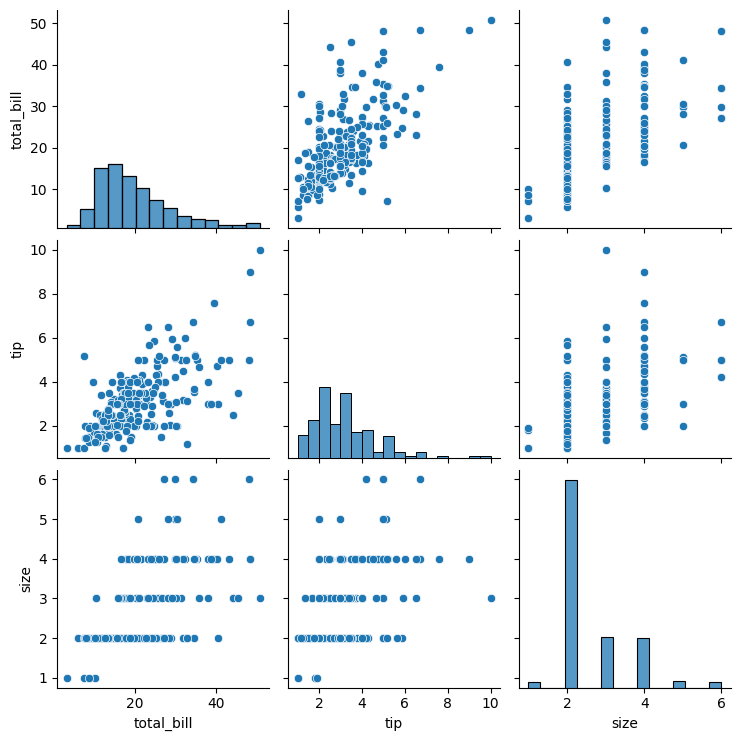

In [ ]:
sns.pairplot(df)


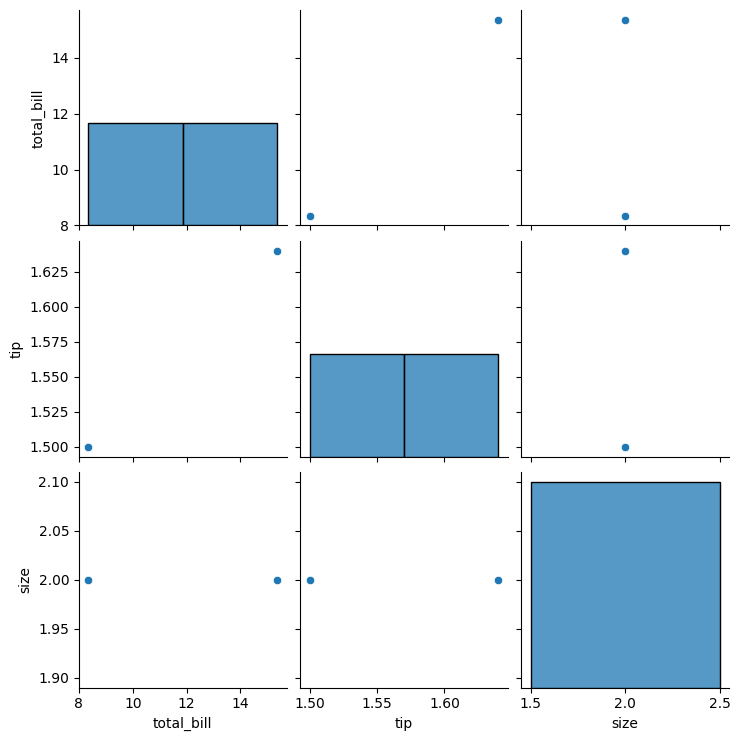

In [ ]:
sns.pairplot(df.sample(2))


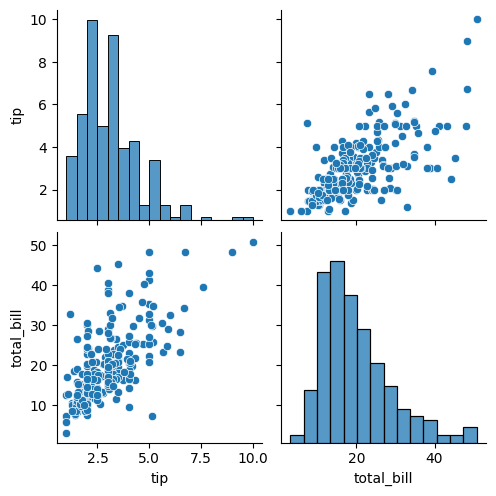

In [ ]:
sns.pairplot(df[['tip', 'total_bill']].sample(244))


<Axes: >

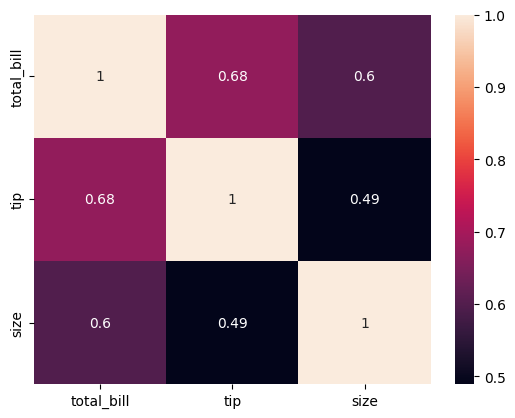

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


##

<Axes: >

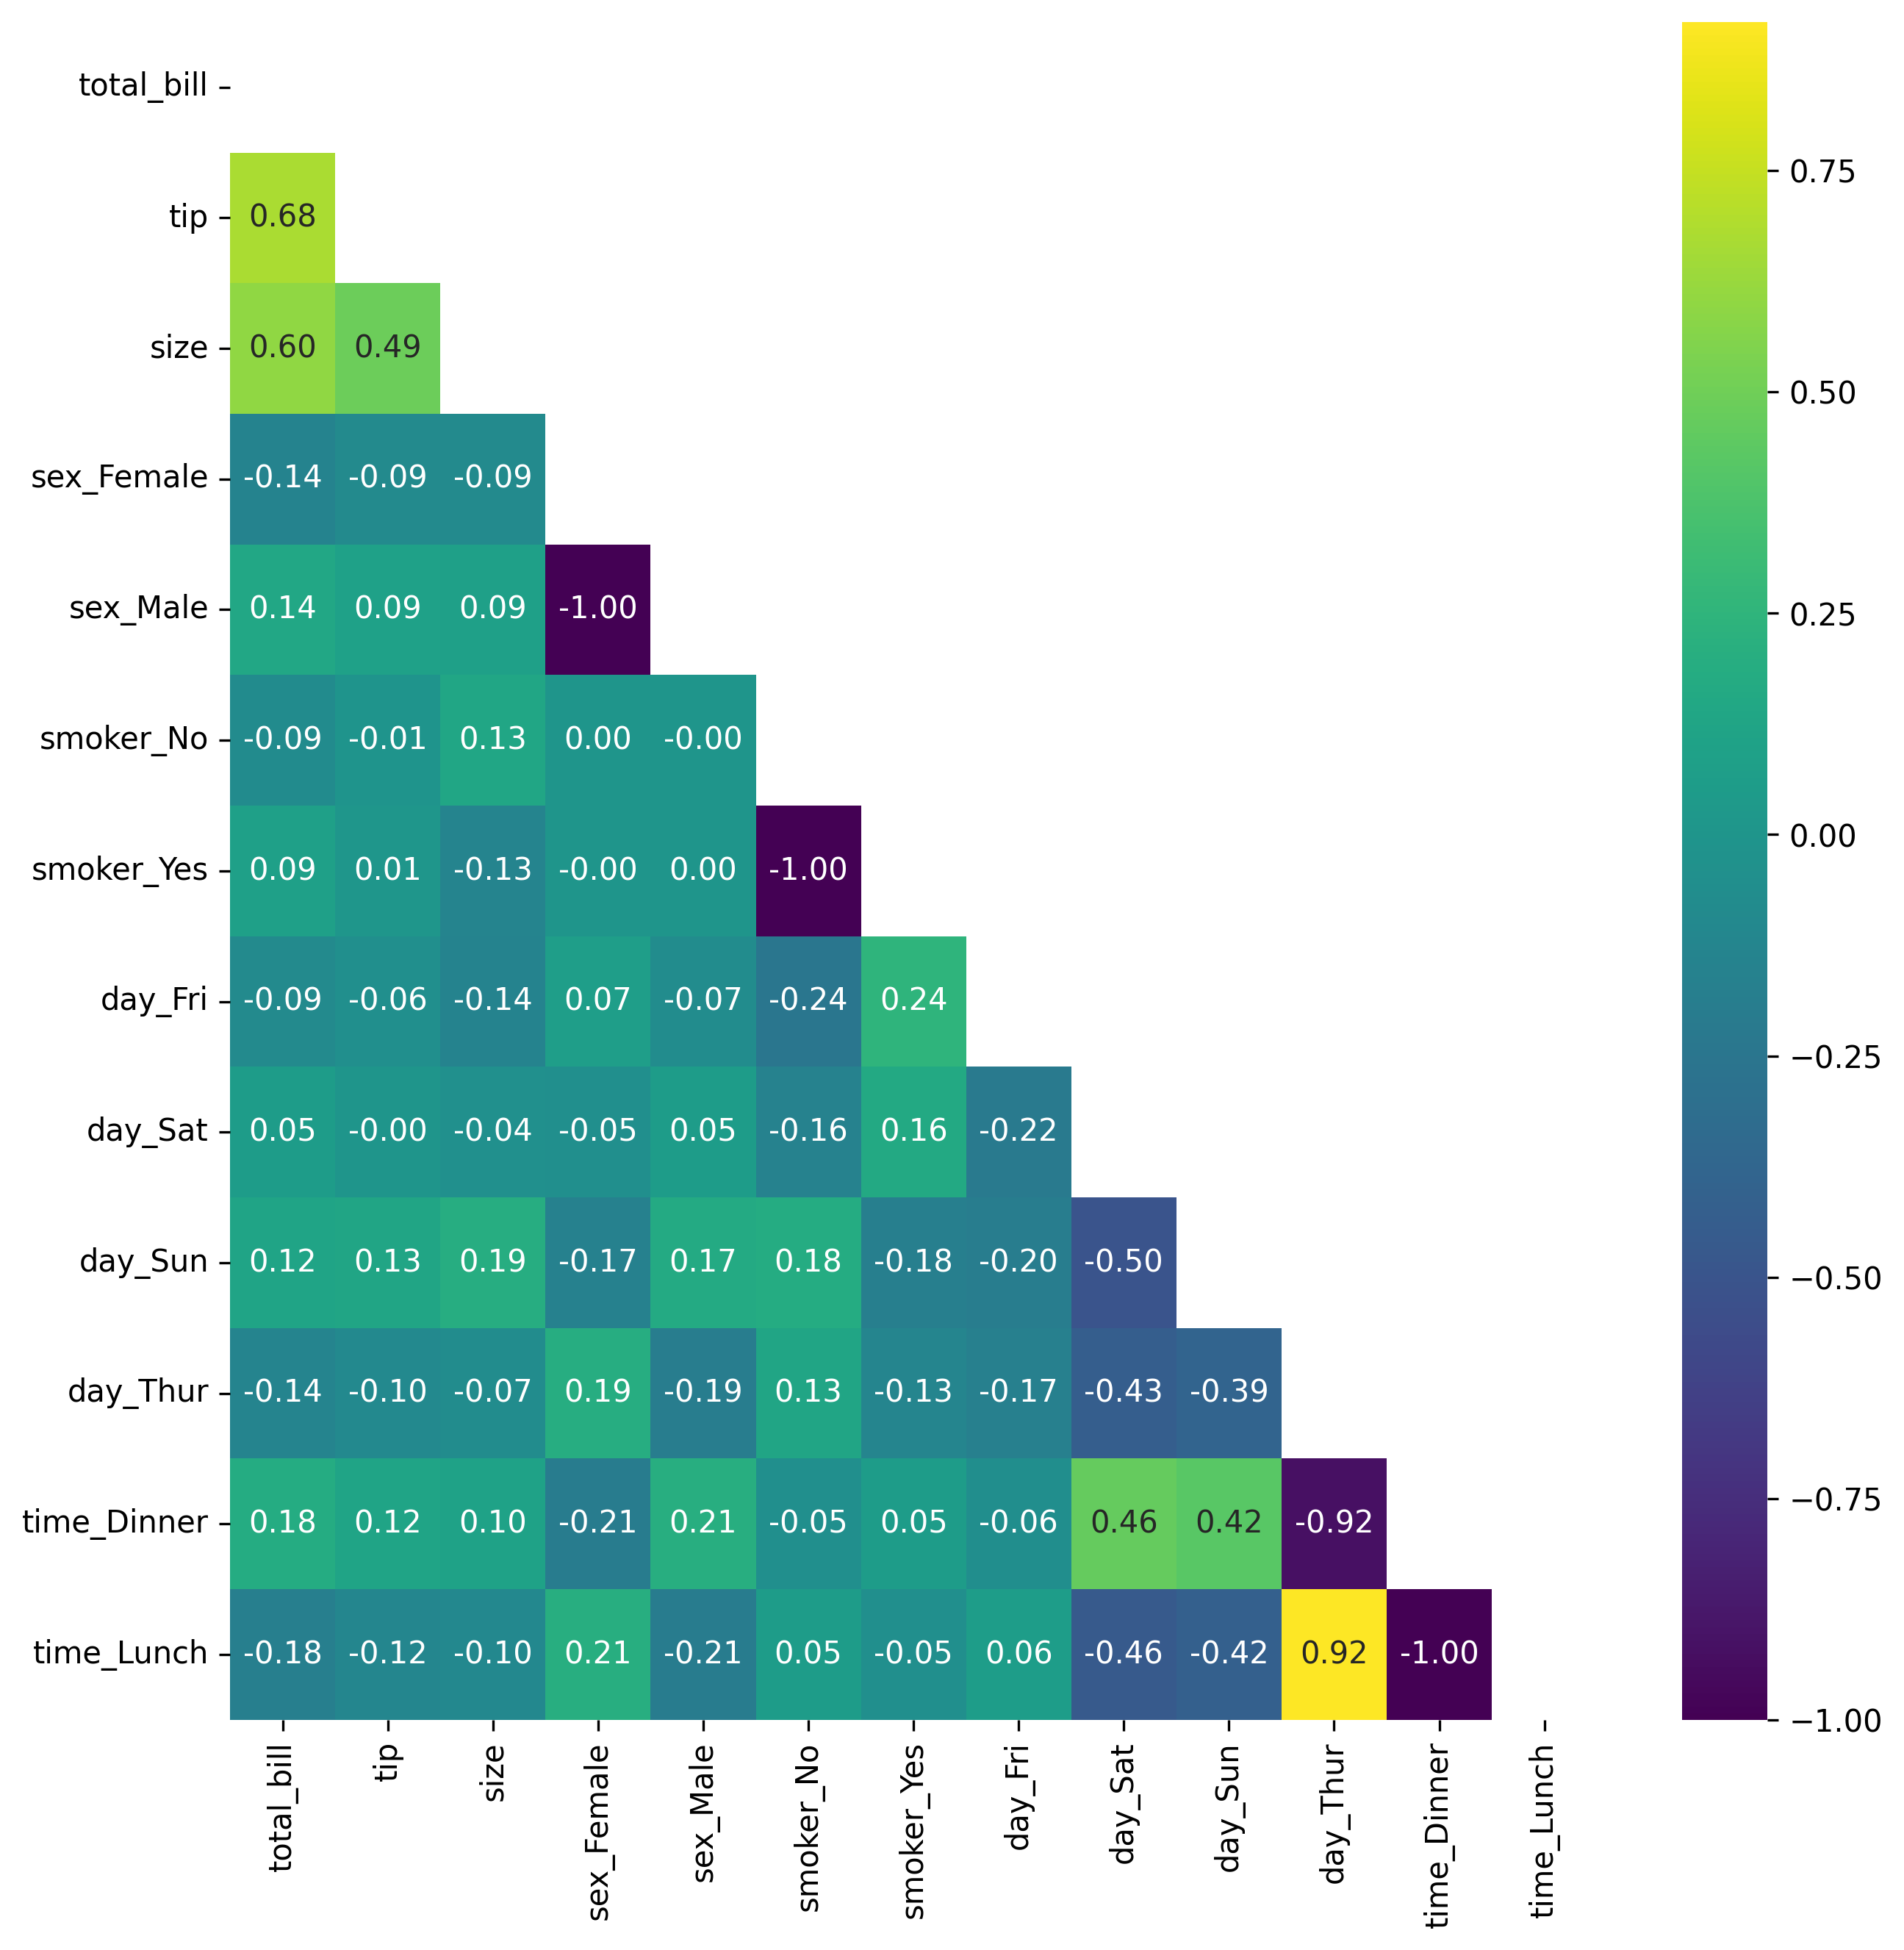

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,10), dpi=300)
df=pd.get_dummies(df)
df_corr=df.corr()
filter=np.triu(df_corr)
sns.heatmap(df_corr, annot=True, cmap="viridis", mask=filter, fmt=".2f")




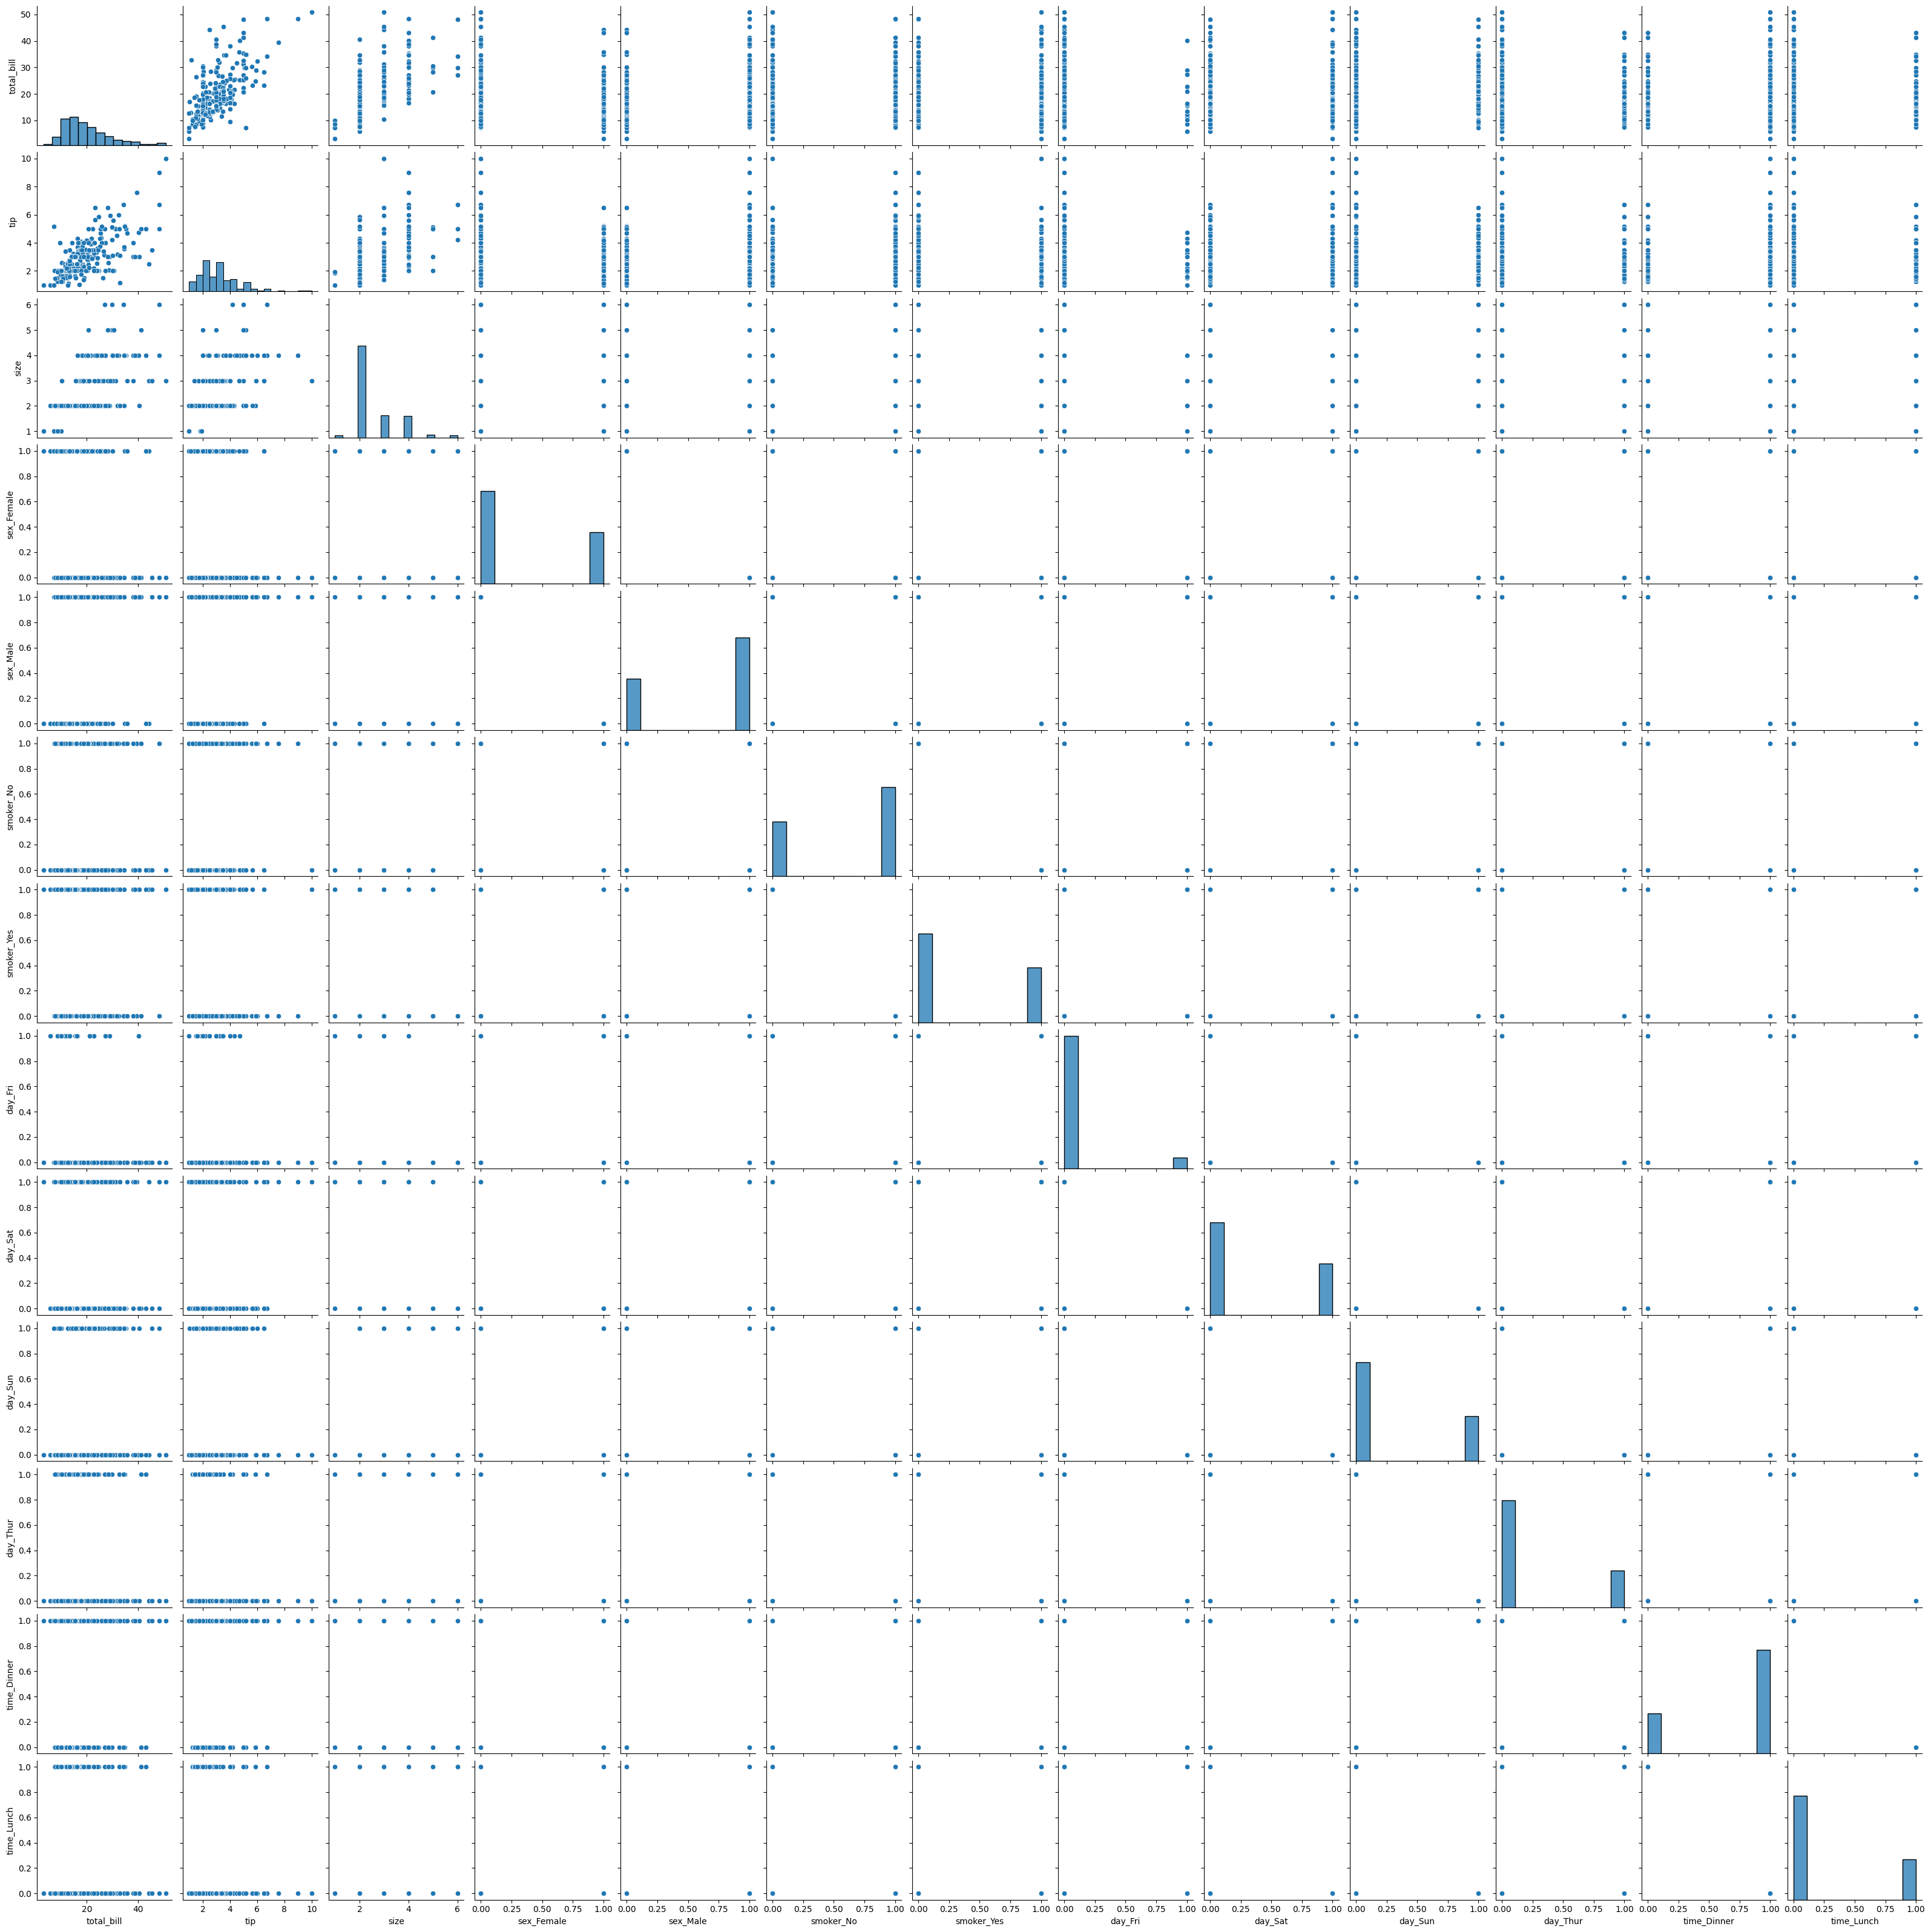

In [ ]:
sns.pairplot(df)


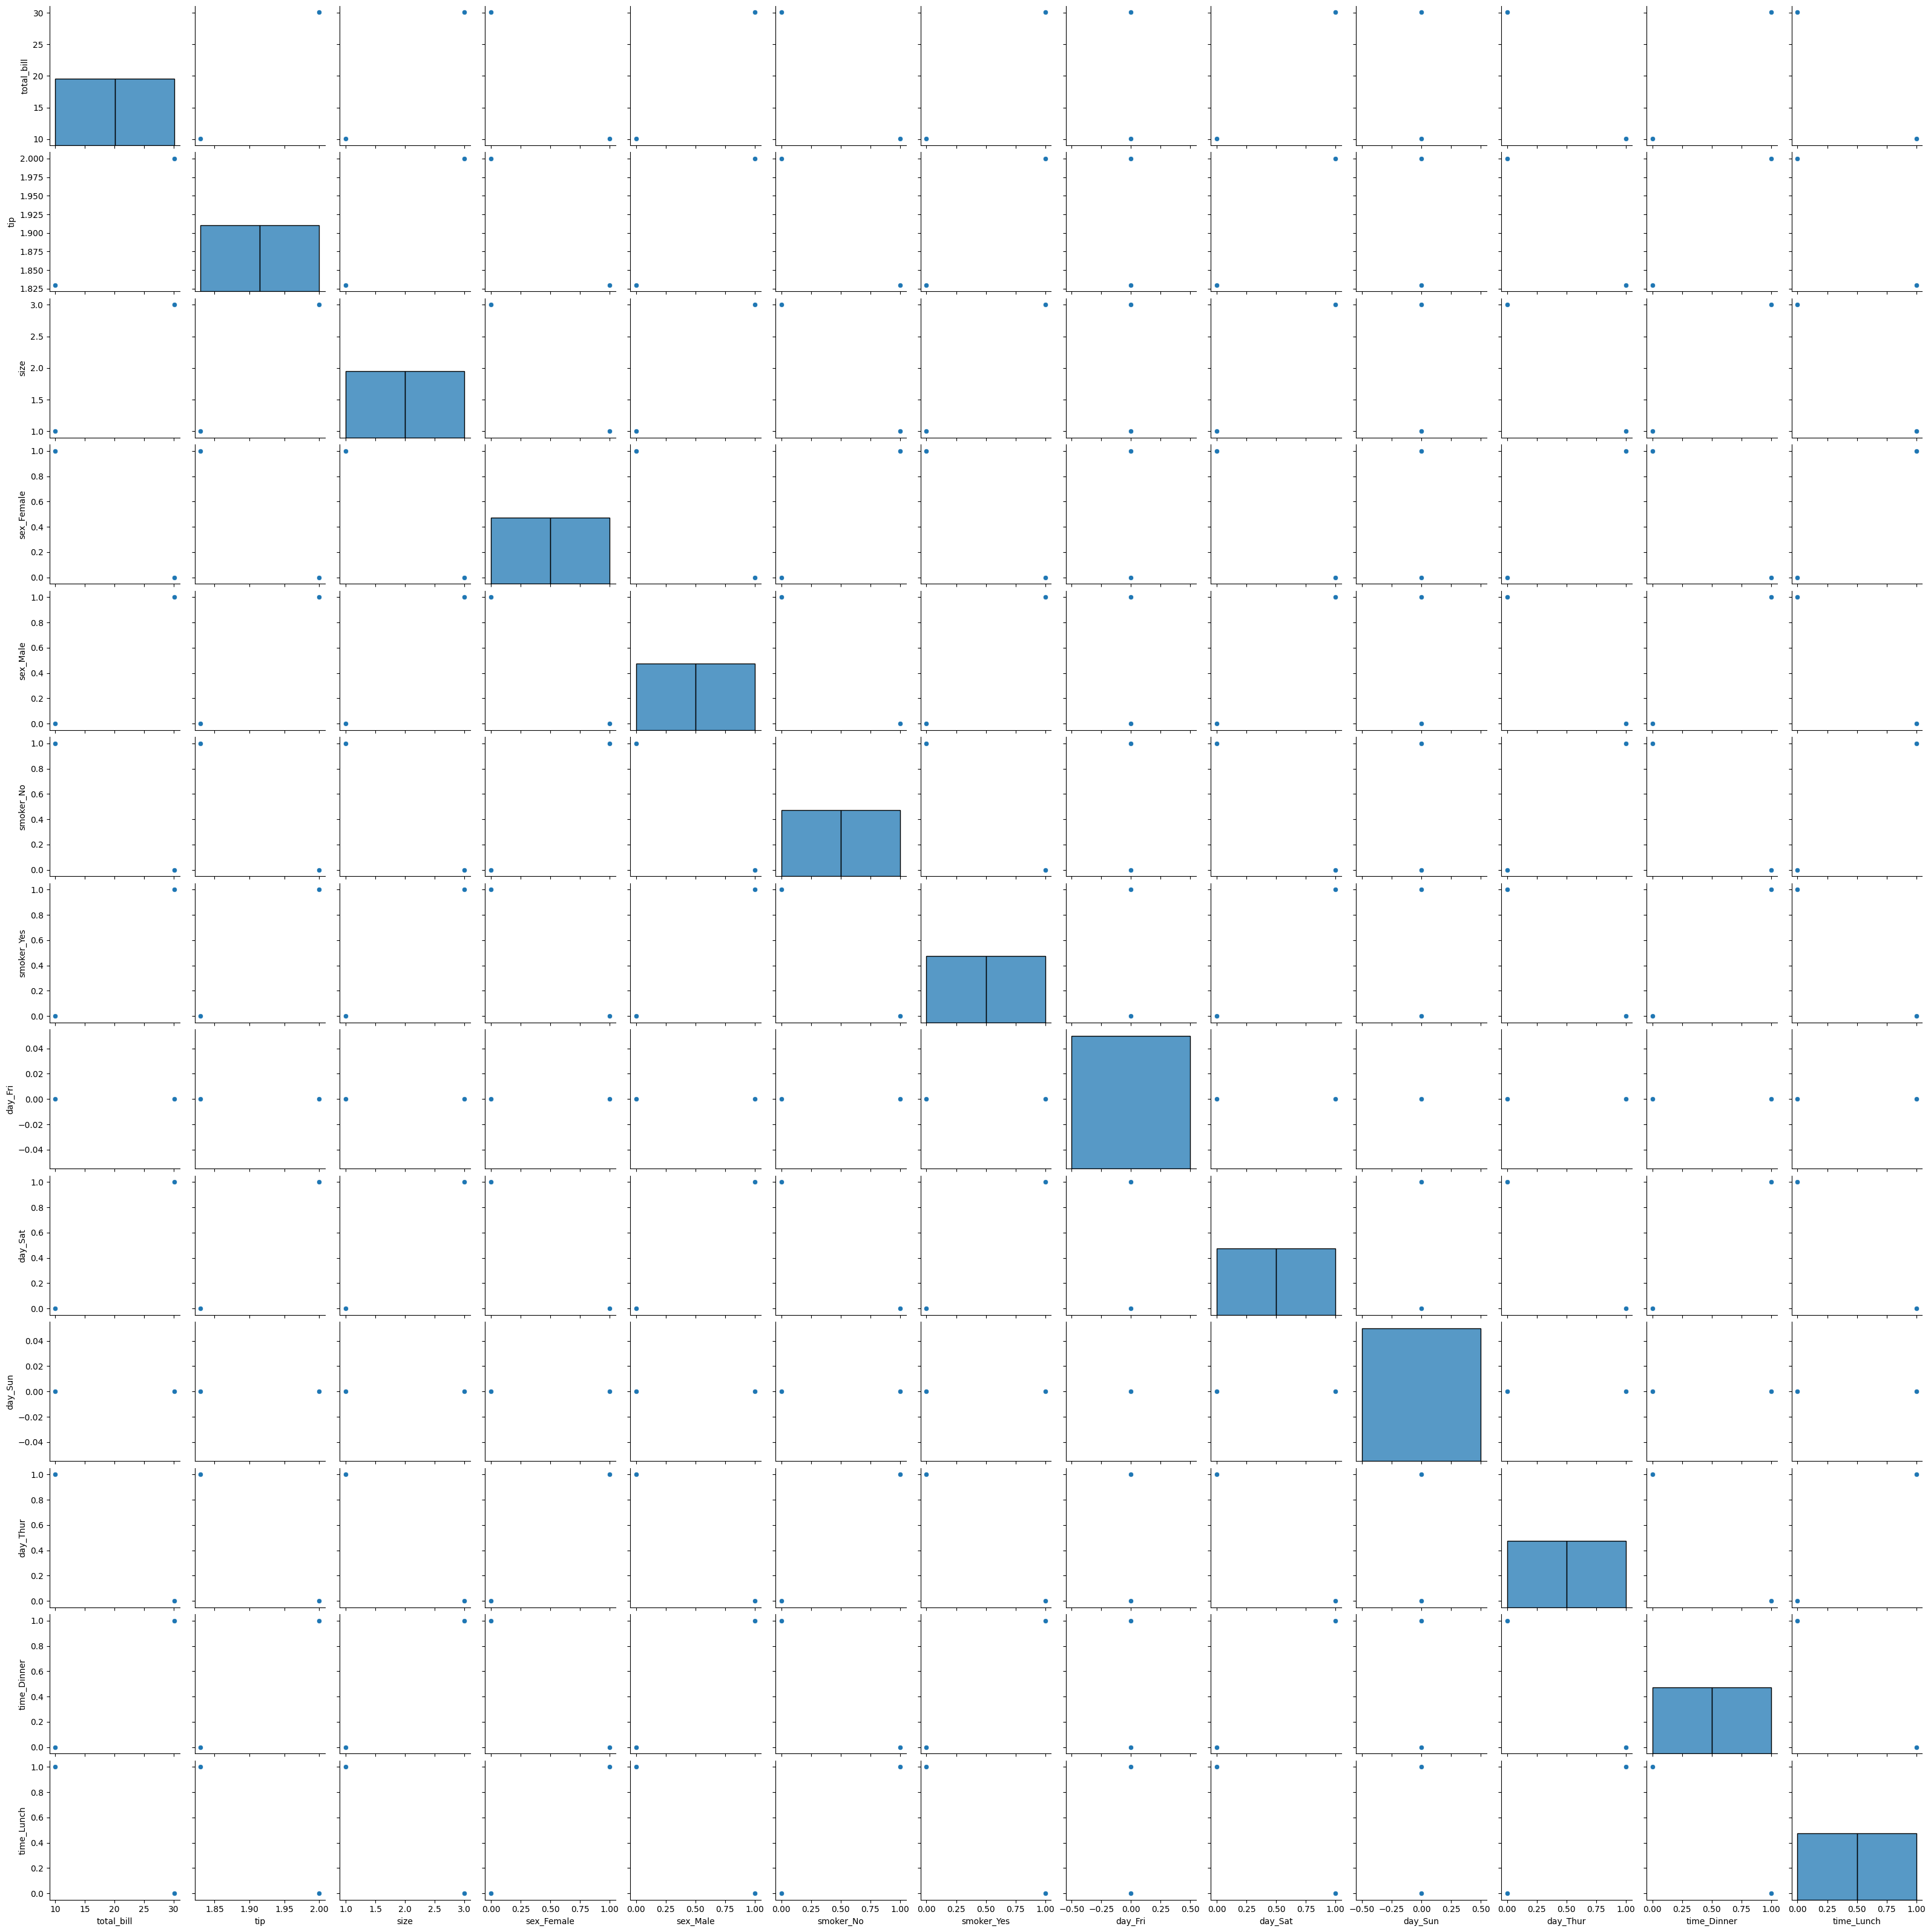

In [ ]:
sns.pairplot(df.sample(2))


##PREPARAR LA X Y LA y.
y será el valor a predecir (Tips).
X será el resto del dataset


In [ ]:
X = df.drop('tip', axis=1)
X

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,2.0,1,0,1,0,0,0,1,0,1,0
1,10.34,3.0,0,1,1,0,0,0,1,0,1,0
2,21.01,3.0,0,1,1,0,0,0,1,0,1,0
3,23.68,2.0,0,1,1,0,0,0,1,0,1,0
4,24.59,4.0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,3.0,0,1,1,0,0,1,0,0,1,0
240,27.18,2.0,1,0,0,1,0,1,0,0,1,0
241,22.67,2.0,0,1,0,1,0,1,0,0,1,0
242,17.82,2.0,0,1,1,0,0,1,0,0,1,0


In [ ]:
y=df['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

##PARTICIONAMIENTO 85/20.
Una parte contiene el 85% de los datos. Se utiliza para entrenar el modelo.
Otra contiene el 15% de los datos. Se utiliza para evaluar el rendimiento del modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


##ESCALADO.
Escalo los valores con MinMaxScaler para que los valores estén en las mismas escalas.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##MODELADO
Uso la función LinearRegression() para generar el modelo a partir de la X (escalada) y la y

In [ ]:
%%time
model = LinearRegression()
model.fit(X_train_scaled, y_train)


CPU times: user 4.35 ms, sys: 1.81 ms, total: 6.15 ms
Wall time: 35.5 ms


LinearRegression()

##VALIDACION

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [ ]:
mean_absolute_error(y_test, predictions)


0.6671331480264893

Primero los valores reales(y_test) y luego las predicciones(predictions), obtenemos el error de 0.6671331480264893 a la hora de predecir una propina.


##EXPORTACION DEL MODELO

In [ ]:
import joblib
joblib.dump(model, 'model.joblib')


['model.joblib']